In [2]:
import pandas as pd
import seaborn as sns

df_washington = pd.read_csv("data/washington.csv", sep = ";")
# df_convention = pd.read_csv("data/convention.csv", sep = ";")
# df_sts = pd.read_csv("data/sts.csv", sep = ";")

def filter(df,amont,aval):
    df = df[df["Libelle noeud amont"]==amont]
    df = df[df["Libelle noeud aval"]==aval]
    return df

def set_date(df):
    df["Date et heure de comptage"] = pd.to_datetime(df_washington["Date et heure de comptage"],format='%Y-%m-%dT%H:%M:%S%z')
    return df


df_washington = filter(df_washington,"Av_Champs_Elysees-Washington","Av_Champs_Elysees-Berri")
df_washington = set_date(df_washington)
# df_sts = filter(df_sts,"Lecourbe-Convention","Convention-Blomet")
# df_convention = filter(df_convention,"Sts_Peres-Voltaire","Sts_Peres-Universite")

df_washington.head()


,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
0,4264,AV_Champs_Elysees,2020-11-02 05:00:00+01:00,144.0,2.25611,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
1,4264,AV_Champs_Elysees,2020-11-01 23:00:00+01:00,245.0,8.11222,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2,4264,AV_Champs_Elysees,2020-07-01 16:00:00+02:00,1138.0,17.86611,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
3,4264,AV_Champs_Elysees,2020-07-01 22:00:00+02:00,880.0,16.03611,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
4,4264,AV_Champs_Elysees,2020-08-05 03:00:00+02:00,487.0,6.35389,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."


In [4]:
df_washington = df_washington.sort_values(by = "Date et heure de comptage")

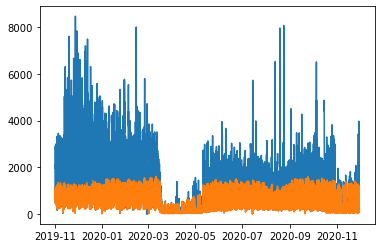

In [12]:
import matplotlib.pyplot as plt

plt.plot(df_washington["Date et heure de comptage"],df_washington["Taux d'occupation"]*100)
plt.plot(df_washington["Date et heure de comptage"],df_washington["Débit horaire"])

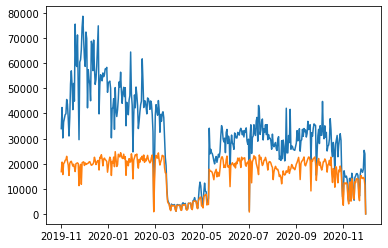

In [33]:
#aggregate by day
df_washington["date"] = [d.date() for d in df_washington["Date et heure de comptage"]]
df_by_date = df_washington.groupby("date").agg("sum").reset_index()
plt.plot(df_by_date["date"],df_by_date["Taux d'occupation"]*100)
plt.plot(df_by_date["date"],df_by_date["Débit horaire"])


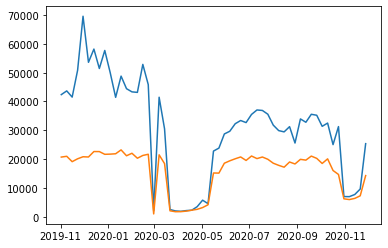

In [40]:
#evolution for saturdays

df_saturday = df_by_date[[d.weekday()==5 for d in df_by_date["date"]]] #weekday = 5 for saturday 

plt.plot(df_saturday["date"],df_saturday["Taux d'occupation"]*100)
plt.plot(df_saturday["date"],df_saturday["Débit horaire"])

